In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("crime_data.csv")

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


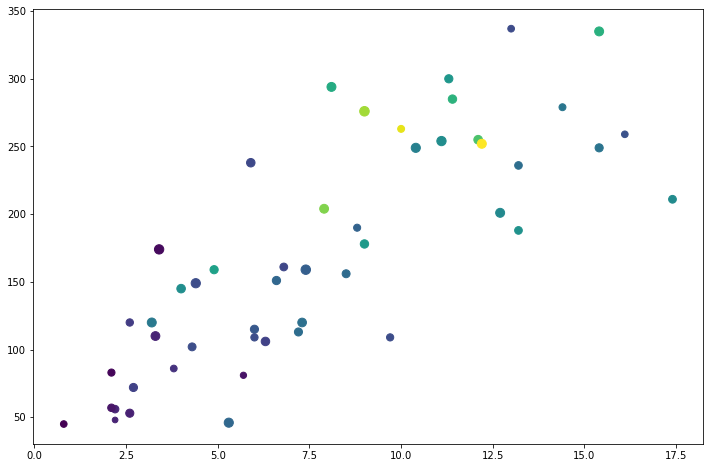

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(df.Murder, df.Assault, df.UrbanPop, df.Rape)

In [4]:
df.shape

(50, 5)

In [5]:
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [7]:
## normalize the data first
def norm(i):
    x= (i - i.min()) / (i.max() - i.min())
    return x

In [8]:
norm_data = norm(df.iloc[:,1:])

In [9]:
import scipy.cluster.hierarchy as sch

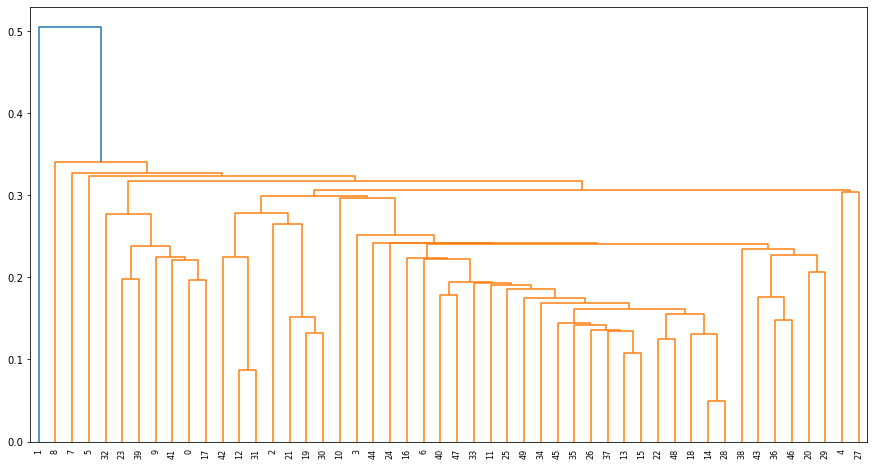

In [22]:
plt.figure(figsize=(15,8))
dendogram = sch.dendrogram(sch.linkage(norm_data, method='single'))

In [11]:
df.shape

(50, 5)

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
## hiharical clustring
hc = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')

In [14]:
hc_pre = hc.fit_predict(norm_data)

In [15]:
clusters = pd.DataFrame(hc_pre)

In [16]:
clusters.value_counts()

0    39
2     7
5     1
4     1
3     1
1     1
dtype: int64

In [17]:
df['clusters'] = clusters

In [18]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,4
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,5
9,Georgia,17.4,211,60,25.8,2
